In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models  import Sequential
from keras.layers import Dense, LSTM

In [ ]:
org_df  = pd.read_csv('crypto_news_twitter_data_final.csv', index_col=0)
org_df = org_df[[ 'close_BTC', 'open_BTC', 'high_BTC', 'low_BTC', 'Volume_BTC',
       'close_ETH', 'Volume_ETH', 'close_LTC', 'Volume_LTC', 'positif',
       'negatif']]
org_df

,close_BTC,open_BTC,high_BTC,low_BTC,Volume_BTC,close_ETH,Volume_ETH,close_LTC,Volume_LTC,positif,negatif
timestamp,,,,,,,,,,,
2020-01-01 00:00:00,7150.00,7168.36,7168.36,7150.00,55.180000,128.40,1124.70,41.02,20.800,0.162828,0.064066
2020-01-01 01:00:00,7197.17,7150.00,7202.52,7150.00,96.120000,130.07,695.71,41.41,1756.520,0.189211,0.072675
2020-01-01 02:00:00,7221.34,7197.17,7221.46,7189.09,62.110000,130.47,225.54,41.65,29.890,0.133965,0.114188
2020-01-01 03:00:00,7198.00,7221.34,7221.34,7192.83,50.120000,129.80,126.54,41.45,57.430,0.153838,0.084686
2020-01-01 04:00:00,7188.62,7198.00,7204.36,7187.02,25.660000,129.55,120.99,41.55,9.192,0.152282,0.067838
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,41335.16,41407.90,41576.29,41265.12,27.238942,2458.02,190.12,143.13,386.200,0.163743,0.064992
2021-07-31 20:00:00,41537.61,41317.48,41898.25,41172.28,70.427539,2490.49,2193.20,143.88,1338.090,0.165231,0.063100
2021-07-31 21:00:00,42007.38,41538.11,42016.96,41531.39,68.164036,2539.75,2507.90,145.56,1134.370,0.164189,0.064684


In [ ]:
val=pd.DataFrame(values)
val["timestamp"] = val.index
val["timestamp"] = pd.date_range("2020-01-01 00:00:00", periods=13872, freq="H")
val["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
val.set_index('timestamp',inplace=True)
val

,0,1,2,3,4,5,6,7,8,9,10
timestamp,,,,,,,,,,,
2020-01-01 00:00:00,7150.00,7168.36,7168.36,7150.00,55.180000,128.40,1124.70,41.02,20.800,0.162828,0.064066
2020-01-01 01:00:00,7197.17,7150.00,7202.52,7150.00,96.120000,130.07,695.71,41.41,1756.520,0.189211,0.072675
2020-01-01 02:00:00,7221.34,7197.17,7221.46,7189.09,62.110000,130.47,225.54,41.65,29.890,0.133965,0.114188
2020-01-01 03:00:00,7198.00,7221.34,7221.34,7192.83,50.120000,129.80,126.54,41.45,57.430,0.153838,0.084686
2020-01-01 04:00:00,7188.62,7198.00,7204.36,7187.02,25.660000,129.55,120.99,41.55,9.192,0.152282,0.067838
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,41335.16,41407.90,41576.29,41265.12,27.238942,2458.02,190.12,143.13,386.200,0.163743,0.064992
2021-07-31 20:00:00,41537.61,41317.48,41898.25,41172.28,70.427539,2490.49,2193.20,143.88,1338.090,0.165231,0.063100
2021-07-31 21:00:00,42007.38,41538.11,42016.96,41531.39,68.164036,2539.75,2507.90,145.56,1134.370,0.164189,0.064684


In [ ]:
def series_to_supervise (data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  # input sequence
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]
  # forecast sequence
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
  agg = concat(cols, axis=1)
  agg.columns = names

  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [ ]:
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform (values)

In [ ]:
sc=pd.DataFrame(scaled)
sc["timestamp"] = sc.index
sc["timestamp"] = pd.date_range("2020-01-01 00:00:00", periods=13872, freq="H")
sc["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
sc.set_index('timestamp',inplace=True)
sc

,0,1,2,3,4,5,6,7,8,9,10
timestamp,,,,,,,,,,,
2020-01-01 00:00:00,0.050214,0.050547,0.042381,0.054465,0.006182,0.006821,0.015303,0.038990,0.000128,0.446178,0.325660
2020-01-01 01:00:00,0.050994,0.050243,0.042947,0.054465,0.010769,0.007215,0.009466,0.040006,0.010845,0.534264,0.375953
2020-01-01 02:00:00,0.051393,0.051023,0.043261,0.055110,0.006959,0.007310,0.003069,0.040631,0.000185,0.349810,0.618479
2020-01-01 03:00:00,0.051008,0.051423,0.043259,0.055172,0.005616,0.007151,0.001722,0.040110,0.000355,0.416162,0.446125
2020-01-01 04:00:00,0.050853,0.051037,0.042978,0.055076,0.002875,0.007092,0.001646,0.040371,0.000057,0.410968,0.347693
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,0.615211,0.616770,0.613167,0.617516,0.003052,0.556846,0.002587,0.304944,0.002384,0.449231,0.331068
2021-07-31 20:00:00,0.618557,0.615275,0.618508,0.615984,0.007891,0.564512,0.029840,0.306897,0.008261,0.454201,0.320018
2021-07-31 21:00:00,0.626322,0.618924,0.620477,0.621910,0.007637,0.576142,0.034122,0.311273,0.007004,0.450723,0.329270


In [ ]:
reframed = series_to_supervise(scaled, 1, 1)
reframed = reframed.iloc[:, :12]
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t)
1,0.050214,0.050547,0.042381,0.054465,0.006182,0.006821,0.015303,0.038990,0.000128,0.446178,0.325660,0.050994
2,0.050994,0.050243,0.042947,0.054465,0.010769,0.007215,0.009466,0.040006,0.010845,0.534264,0.375953,0.051393
3,0.051393,0.051023,0.043261,0.055110,0.006959,0.007310,0.003069,0.040631,0.000185,0.349810,0.618479,0.051008
4,0.051008,0.051423,0.043259,0.055172,0.005616,0.007151,0.001722,0.040110,0.000355,0.416162,0.446125,0.050853
5,0.050853,0.051037,0.042978,0.055076,0.002875,0.007092,0.001646,0.040371,0.000057,0.410968,0.347693,0.050950
...,...,...,...,...,...,...,...,...,...,...,...,...
13867,0.616493,0.613151,0.611294,0.615264,0.003889,0.556865,0.002367,0.305673,0.001068,0.435800,0.327678,0.615211
13868,0.615211,0.616770,0.613167,0.617516,0.003052,0.556846,0.002587,0.304944,0.002384,0.449231,0.331068,0.618557
13869,0.618557,0.615275,0.618508,0.615984,0.007891,0.564512,0.029840,0.306897,0.008261,0.454201,0.320018,0.626322
13870,0.626322,0.618924,0.620477,0.621910,0.007637,0.576142,0.034122,0.311273,0.007004,0.450723,0.329270,0.624680


In [ ]:
values = reframed.values
n_train = 11097
train = values[:n_train, :]
test = values[n_train:, :]
trainX,trainY = train[:,:-1], train[:,-1]
testX,testY = test[:,:-1], test[:,-1]
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(11097, 1, 11) (11097,) (2774, 1, 11) (2774,)


In [ ]:
np.random.seed(7)
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history= model.fit(trainX, trainY,validation_data=(testX,testY), epochs=500, batch_size=128, verbose=1, shuffle=False)

Epoch 1/500
87/87 [==============================] - 5s 17ms/step - loss: 0.0017 - val_loss: 0.0198
Epoch 2/500
87/87 [==============================] - 1s 7ms/step - loss: 0.0109 - val_loss: 0.0095
Epoch 3/500
87/87 [==============================] - 1s 7ms/step - loss: 0.0080 - val_loss: 0.0216
Epoch 4/500
87/87 [==============================] - 1s 7ms/step - loss: 0.0059 - val_loss: 0.0249
Epoch 5/500
87/87 [==============================] - 1s 7ms/step - loss: 0.0030 - val_loss: 0.0158
Epoch 6/500
87/87 [==============================] - 1s 7ms/step - loss: 8.6918e-04 - val_loss: 0.0109
Epoch 7/500
87/87 [==============================] - 1s 7ms/step - loss: 2.6304e-04 - val_loss: 0.0084
Epoch 8/500
87/87 [==============================] - 1s 7ms/step - loss: 3.0285e-04 - val_loss: 0.0072
Epoch 9/500
87/87 [==============================] - 1s 7ms/step - loss: 3.5550e-04 - val_loss: 0.0065
Epoch 10/500
87/87 [==============================] - 1s 6ms/step - loss: 2.8591e-04 - val_l

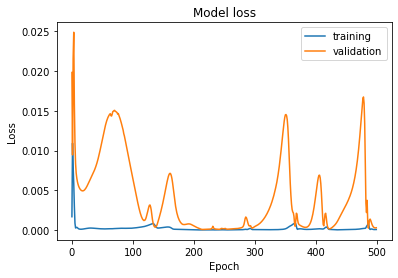

In [ ]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['training', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
n_future = 24*7
predict_future = model.predict(testX[-n_future:])
predict_train = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))

In [ ]:
inv_predtr = concatenate((predict_train, testX[:,1:]), axis=1)
inv_predtr = scaler.inverse_transform(inv_predtr)
inv_predtr = inv_predtr[:,0]
print("Hasil Pengujian")
print(inv_predtr)

Hasil Pengujian
[57859.348 57529.01  56680.12  ... 43013.746 43269.375 43247.617]


In [ ]:
testY = testY.reshape((len(testY), 1))
inv_Y = concatenate((testY, testX[:,1:]), axis=1)
inv_Y = scaler.inverse_transform(inv_Y)
inv_Y = inv_Y[:,0]
print("Data Aktual")
print(inv_Y)

Data Aktual
[56856.31 56317.92 56466.05 ... 42007.38 41908.06 41490.13]


In [ ]:
inv_pr = concatenate((predict_future, testX[:168,1:]), axis=1)
inv_pr = scaler.inverse_transform(inv_pr)
inv_pr = inv_pr[:,0]
print("Hasil Prediksi")
print(inv_pr)

Hasil Prediksi
[35347.895 35346.133 35101.83  35318.434 35441.926 35525.94  35580.758
 35650.81  35952.496 35995.1   35833.49  35670.59  35562.68  35511.8
 35546.99  35201.633 35253.29  35349.76  35495.2   35664.73  35587.38
 35584.164 35625.27  35717.316 36219.105 37516.02  39605.492 39451.133
 39552.934 39827.5   39960.32  40215.88  39912.79  39680.375 39708.293
 39947.93  40032.492 40133.387 39922.406 39675.12  39862.52  40328.21
 40596.574 41155.926 41342.535 40103.02  38628.555 38456.703 38689.043
 38594.63  38387.242 38109.586 37991.766 38145.605 38451.906 38527.176
 38512.723 38616.54  38805.97  38982.82  39297.824 39621.203 39849.85
 39638.07  39540.082 39331.43  39095.945 39151.984 39204.4   39360.836
 39623.473 40252.85  40777.656 40728.293 41014.7   41439.453 41363.668
 41260.812 41503.03  41400.785 41310.27  41353.25  41243.03  41640.62
 42023.277 41822.688 41178.78  41126.98  41179.52  41398.625 41050.89
 41272.902 42053.6   41688.2   41543.566 41440.492 41389.906 41276.32

In [ ]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[2]))
trainY = trainY.reshape((len(trainY), 1))
inv_trY = concatenate((trainY, trainX[:,1:]), axis=1)
inv_trY = scaler.inverse_transform(inv_trY)
inv_trY = inv_trY[:,0]
print("Data Train")
print(inv_trY)

Data Train
[ 7197.17  7221.34  7198.   ... 57861.67 57741.15 57465.47]


In [ ]:
trY=pd.DataFrame(inv_trY)
trY=trY[[0]]
trY.columns = ['Prediksi']
trY["timestamp"] = trY.index
trY["timestamp"] = pd.date_range("2020-01-01 00:00:00", periods=11097, freq="H")
trY["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
trY.set_index('timestamp',inplace=True)
trY

,Prediksi
timestamp,
2020-01-01 00:00:00,7197.169922
2020-01-01 01:00:00,7221.339844
2020-01-01 02:00:00,7198.000000
2020-01-01 03:00:00,7188.620117
2020-01-01 04:00:00,7194.509766
...,...
2021-04-07 04:00:00,58302.558594
2021-04-07 05:00:00,58009.378906
2021-04-07 06:00:00,57861.671875


In [ ]:
prf=pd.DataFrame(inv_pr)
prf=prf[[0]]
prf.columns = ['Prediksi']
prf["timestamp"] = prf.index
prf["timestamp"] = pd.date_range("2021-08-01 00:00:00", periods=168, freq="H")
prf["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
prf.set_index('timestamp',inplace=True)
prt=pd.DataFrame(inv_predtr)
prt=prt[[0]]
prt.columns = ['Pengujian']
prt["timestamp"] = prt.index
prt["timestamp"] = pd.date_range("2021-04-07 10:00:00", periods=2774, freq="H")
prt["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
prt.set_index('timestamp',inplace=True)
ty=pd.DataFrame(inv_Y)
ty=ty[[0]]
ty.columns = ['Aktual']
ty["timestamp"] = ty.index
ty["timestamp"] = pd.date_range("2021-04-07 10:00:00", periods=2774, freq="H")
ty["timestamp"] .apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
ty.set_index('timestamp',inplace=True)

Text(0.5, 1.0, 'Bitcoin Price Prediction')

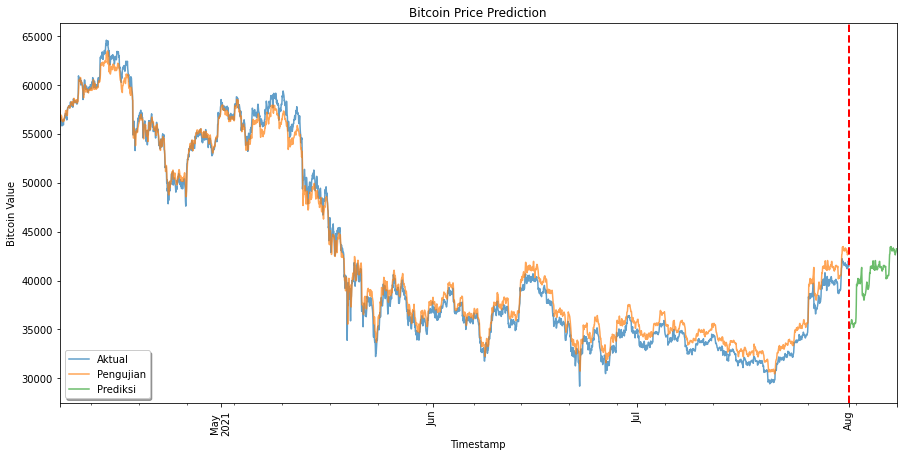

In [ ]:
time_df = pd.concat([ty, prt], axis=1)
time_df1 = pd.concat([time_df, prf])
# time_df1.set_index('timestamp',inplace=True)

fig, ax = pyplot.subplots(figsize=(15,7))
time_df1.plot(ax=ax,rot=90,alpha=0.7)
pyplot.axvline(x = min(prf.index), color='red', linewidth=2, linestyle='--')
pyplot.legend(shadow=True, loc='best')
pyplot.xlabel('Timestamp')
pyplot.ylabel('Bitcoin Value')
pyplot.title('Bitcoin Price Prediction')

In [ ]:
import math

# perhitungan kesalahan error
RMSE = sqrt(mean_squared_error(inv_Y, inv_predtr))
# perhitungan tingkat akurasi
MAPE_test = np.mean(np.abs((inv_Y - inv_predtr)/inv_Y))*100
Acc_test = 100-MAPE_test


print('-' * 50)
# print('Kesalahan Error Training Set: %.2f RMSE' % (trainScore_RMSE))
print('Error (RMSE): %.2f ' % (RMSE))


print('-' * 50)
# print('Akurasi Training Set: %.2f%%'  % (ACC_train))
print('Akurasi: %.2f%%' % (Acc_test))

--------------------------------------------------
Error (RMSE): 1039.40 
--------------------------------------------------
Akurasi: 97.70%


In [ ]:
df_predict=pd.read_csv(r'D:\1. COLLEGE THINGS\Skripsi\Dataset\Crypto\BTCUSD_1h(aug).csv', index_col=0)
df_predict = df_predict[['close_BTC']]
df_predict = df_predict.sort_index(ascending=True)
df_predict = df_predict.iloc[:168]
df_predict.rename(columns = {'close_BTC':'Harga Aktual'}, inplace = True)
df_predict

,Harga Aktual
timestamp,
2021-08-01 00:00:00,41725.24
2021-08-01 01:00:00,41749.34
2021-08-01 02:00:00,41850.15
2021-08-01 03:00:00,42478.00
2021-08-01 04:00:00,42087.14
...,...
2021-08-07 19:00:00,44015.10
2021-08-07 20:00:00,43983.09
2021-08-07 21:00:00,43588.75


In [ ]:
# combine.rename(columns = {'close_BTC':'Harga Prediksi'}, inplace = True)
combine.to_csv('/content/drive/MyDrive/Skripsi (1)/hasilpre64-32-128.csv')

Text(0.5, 1.0, 'Bitcoin Price Prediction')

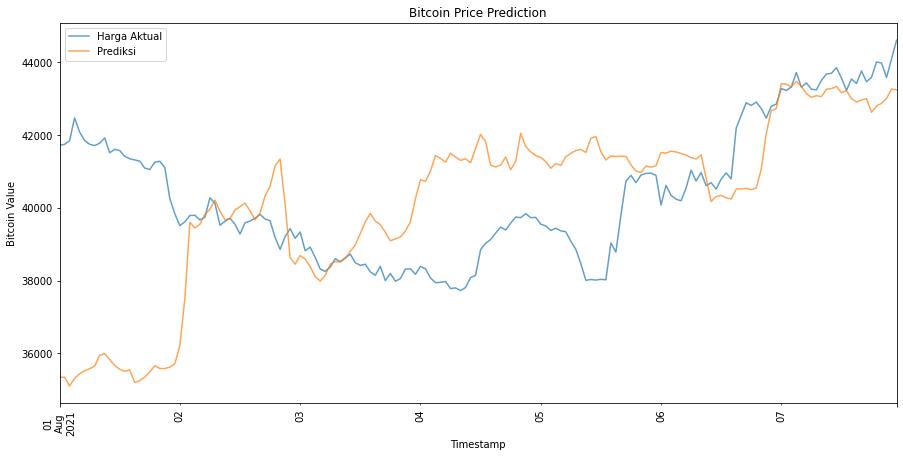

In [ ]:
combine = df_predict.join(prf, how='outer')

fig, ax = pyplot.subplots(figsize=(15,7))
combine.plot(ax=ax,rot=90,alpha=0.7)
pyplot.xlabel('Timestamp')
pyplot.ylabel('Bitcoin Value')
pyplot.title('Bitcoin Price Prediction')

In [ ]:
combine

,Harga Aktual,Prediksi
timestamp,,
2021-08-01 00:00:00,41725.24,35347.894531
2021-08-01 01:00:00,41749.34,35346.132812
2021-08-01 02:00:00,41850.15,35101.828125
2021-08-01 03:00:00,42478.00,35318.433594
2021-08-01 04:00:00,42087.14,35441.925781
...,...,...
2021-08-07 19:00:00,44015.10,42803.113281
2021-08-07 20:00:00,43983.09,42878.023438
2021-08-07 21:00:00,43588.75,43013.746094


In [ ]:
import math
df_predict = df_predict.values
prf = prf.values
# perhitungan kesalahan error
RMSE = sqrt(mean_squared_error(df_predict, prf))
# perhitungan tingkat akurasi/
MAPE_test = np.mean(np.abs((df_predict - prf)/df_predict))*100
Acc_test = 100-MAPE_test


print('-' * 50)
# print('Kesalahan Error Training Set: %.2f RMSE' % (trainScore_RMSE))
print('Error (RMSE): %.2f ' % (RMSE))


print('-' * 50)
# print('Akurasi Training Set: %.2f%%'  % (ACC_train))
print('Akurasi: %.2f%%' % (Acc_test))

--------------------------------------------------
Error (RMSE): 2731.99 
--------------------------------------------------
Akurasi: 95.22%


Model Baru